In [417]:
import pandas as pd
import numpy as np

def calc_score(test_choices, pred_choices, tk):
    s = 0
    for gt, p in zip(test_choices, pred_choices):
        s += int(gt in p)
    score = s / len(test_choices)
    return score

In [1013]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
sample_submission = pd.read_csv('sample-submission.csv')
item_features = pd.read_csv('item-features.csv')
user_features = pd.read_csv('user-features.csv')

In [7]:
train.head()

,user_id,item_id,like,timestamp
0,140,342,0,1490936622
1,378,172,1,1490936628
2,150,182,0,1490936650
3,455,17,0,1490936704
4,350,409,0,1490936735


In [8]:
test.head()

,user_id,timestamp
0,166,1490944431
1,26,1490957371
2,41,1490958147
3,286,1490971255
4,108,1490976836


In [10]:
item_features

,item_id,0,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
0,35,0.005646,-0.012780,-0.011941,0.016942,-0.004044,0.005566,0.006587,0.005411,-0.024627,...,-0.034090,-0.005673,0.009111,-0.008770,-0.016189,-0.016189,0.003432,-0.009490,-0.009490,0.002416
1,19,0.002530,-0.005726,-0.005350,0.007591,-0.001812,0.002494,0.002951,0.002424,-0.011035,...,-0.015274,-0.002542,0.004082,-0.003929,-0.007254,-0.007254,0.001538,-0.004252,-0.004252,0.001082
2,145,0.001592,-0.003604,-0.003368,0.004778,-0.001141,0.001570,0.001858,0.001526,-0.006946,...,-0.009615,-0.001600,0.002570,-0.002473,-0.004566,-0.004566,0.000968,-0.002677,-0.002677,0.000681
3,36,0.002866,-0.006486,-0.006060,0.008598,-0.002052,0.002825,0.003343,0.002746,-0.012499,...,-0.017301,-0.002879,0.004624,-0.004451,-0.008216,-0.008216,0.001742,-0.004816,-0.004816,0.001226
4,357,0.000602,-0.001362,-0.001273,0.001806,-0.000431,0.000593,0.000702,0.000577,-0.002625,...,-0.003634,-0.000605,0.000971,-0.000935,-0.001726,-0.001726,0.000366,-0.001012,-0.001012,0.000258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,263,0.000695,-0.001573,-0.001470,0.002085,-0.000498,0.000685,0.000811,0.000666,-0.003031,...,-0.004196,-0.000698,0.001121,-0.001079,-0.001993,-0.001993,0.000422,-0.001168,-0.001168,0.000297
440,248,0.000695,-0.001573,-0.001470,0.002085,-0.000498,0.000685,0.000811,0.000666,-0.003031,...,-0.004196,-0.000698,0.001121,-0.001079,-0.001993,-0.001993,0.000422,-0.001168,-0.001168,0.000297
441,187,0.000602,-0.001362,-0.001273,0.001806,-0.000431,0.000593,0.000702,0.000577,-0.002625,...,-0.003634,-0.000605,0.000971,-0.000935,-0.001726,-0.001726,0.000366,-0.001012,-0.001012,0.000258
442,132,0.000919,-0.002081,-0.001944,0.002759,-0.000658,0.000906,0.001073,0.000881,-0.004010,...,-0.005551,-0.000924,0.001484,-0.001428,-0.002636,-0.002636,0.000559,-0.001545,-0.001545,0.000393


In [174]:
train.shape, test.shape

((8674, 4), (497, 2))

In [482]:
b = item_features.rename(mapper=lambda x: 'I_'+str(x), axis=1)
b = b.rename(mapper={'I_item_id':'item_id'}, axis=1)

c = user_features.rename(mapper=lambda x: 'U_'+str(x), axis=1)
c = c.rename(mapper={'U_user_id':'user_id'}, axis=1)

train_b = train.merge(b)
final_train = train_b.merge(c)

In [350]:
user_ids = final_train['user_id']
item_ids = final_train['item_id']
timestamps = final_train['timestamp']

In [483]:
#Мусорка
X_train = final_train.drop(['like'], axis=1)
y_train = final_train['like']
X_train.drop(['item_id', 'user_id'], axis=1, inplace=True)

object_features = X_train.columns[X_train.dtypes=='object']
int_float_features = np.concatenate([X_train.columns[X_train.dtypes=='int64'], X_train.columns[X_train.dtypes=='float64']])
len(int_float_features) + len(object_features) == X_train.shape[1]
X_train_OHE = pd.get_dummies(X_train[object_features])

In [484]:
X_train

,timestamp,I_0,I_1,I_2,I_3,I_4,I_5,I_6,I_7,I_8,...,U_22,U_23,U_24,U_25,U_26,U_27,U_28,U_29,U_30,U_31
0,1490936622,0.000348,-0.000787,-0.000735,0.001043,-0.000249,0.000343,0.000405,0.000333,-0.001516,...,-0.007850,-0.001306,0.002098,-0.002020,-0.003728,-0.003728,0.000790,-0.002185,-0.002185,0.000556
1,1491198931,0.000491,-0.001112,-0.001039,0.001475,-0.000352,0.000484,0.000573,0.000471,-0.002144,...,-0.007850,-0.001306,0.002098,-0.002020,-0.003728,-0.003728,0.000790,-0.002185,-0.002185,0.000556
2,1491134318,0.000602,-0.001362,-0.001273,0.001806,-0.000431,0.000593,0.000702,0.000577,-0.002625,...,-0.007850,-0.001306,0.002098,-0.002020,-0.003728,-0.003728,0.000790,-0.002185,-0.002185,0.000556
3,1490998674,0.000348,-0.000787,-0.000735,0.001043,-0.000249,0.000343,0.000405,0.000333,-0.001516,...,-0.007850,-0.001306,0.002098,-0.002020,-0.003728,-0.003728,0.000790,-0.002185,-0.002185,0.000556
4,1490943164,0.000348,-0.000787,-0.000735,0.001043,-0.000249,0.000343,0.000405,0.000333,-0.001516,...,-0.007850,-0.001306,0.002098,-0.002020,-0.003728,-0.003728,0.000790,-0.002185,-0.002185,0.000556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8669,1491138405,0.000348,-0.000787,-0.000735,0.001043,-0.000249,0.000343,0.000405,0.000333,-0.001516,...,-0.003634,-0.000605,0.000971,-0.000935,-0.001726,-0.001726,0.000366,-0.001012,-0.001012,0.000258
8670,1491184887,0.000348,-0.000787,-0.000735,0.001043,-0.000249,0.000343,0.000405,0.000333,-0.001516,...,-0.003634,-0.000605,0.000971,-0.000935,-0.001726,-0.001726,0.000366,-0.001012,-0.001012,0.000258
8671,1491073355,0.000602,-0.001362,-0.001273,0.001806,-0.000431,0.000593,0.000702,0.000577,-0.002625,...,-0.003634,-0.000605,0.000971,-0.000935,-0.001726,-0.001726,0.000366,-0.001012,-0.001012,0.000258
8672,1491076065,0.000602,-0.001362,-0.001273,0.001806,-0.000431,0.000593,0.000702,0.000577,-0.002625,...,-0.003634,-0.000605,0.000971,-0.000935,-0.001726,-0.001726,0.000366,-0.001012,-0.001012,0.000258


In [310]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [351]:
from sklearn.model_selection import train_test_split

X_train_sc, X_val_sc, y_train_sc, y_val_sc, id_train, id_val, item_train, item_val, time_train, time_val = train_test_split(X_train_scaled,
                                                                                                      y_train, user_ids,
                                                                                                      item_ids, timestamps,test_size=0.2)

In [392]:
user_item_y = np.concatenate([id_val.values.reshape(-1, 1), 
                              item_val.values.reshape(-1, 1), y_val_sc.values.reshape(-1, 1), 
                              time_val.values.reshape(-1, 1)], axis=1)

UIY_df = pd.DataFrame(user_item_y, columns=['user_id', 'item_id', 'target', 'timestamp'])
UIY_positive = UIY_df[UIY_df['target']==1]
test_val = UIY_positive.drop(['item_id', 'target'], axis = 1)
correct = UIY_positive['item_id'].values

In [638]:
count = 0
for a in test['user_id'].unique():
    if a in final_train['user_id'].unique():
        count +=1
        
count == len(final_train['user_id'].unique())

True

In [644]:
user_dict = {}
for user in final_train['user_id'].unique():
    len_df = len(final_train[final_train['user_id']==user])
    user_dict[user] = len_df

In [650]:
min(user_dict.values()), max(user_dict.values())

(15, 31)

In [695]:
scaler_for_each = StandardScaler()
scaler_for_each.fit(final_train.iloc[:, 4:36])

StandardScaler()

В худшем случае 15 данных на пользователя, можно попробовать построить логистическую регрессию для каждого пользователя

In [ ]:
np.setdiff1d

In [992]:
user_model = {}
for user in final_train['user_id'].unique():
    y_train_user = final_train[final_train['user_id']==user]['like']
    X_train_user = final_train[final_train['user_id']==user].iloc[:, 4:36]
    already_seen = final_train[final_train['user_id']==user]['item_id']
    X_train_user_scaled = scaler_for_each.transform(X_train_user)
    model = SVC(probability=True)
    model.fit(X_train_user_scaled, y_train_user)
    user_model[user] = [model, already_seen.values]

In [993]:
user_predictions = {}
X_test_user = item_features.iloc[:, 1:]
X_test_user_scaled = scaler_for_each.transform(X_test_user)
item_ids = item_features['item_id'].values
for user in user_model.keys():
    predictions = user_model[user][0].predict_proba(X_test_user_scaled)
    temp_df = pd.DataFrame(np.concatenate([predictions[:, 1].reshape(-1, 1), item_ids.reshape(-1, 1)], axis=1), 
                           columns=['proba', 'item_id'])
    temp_df = temp_df.astype({'item_id':'int64'})
    sorted_ids = temp_df.sort_values(by='proba', ascending=False)['item_id'].values
    final_pred = np.setdiff1d(sorted_ids, user_model[user][1], assume_unique=True)
    user_predictions[user] = final_pred[:20]

In [995]:
for_each = creating_array_for_each(test_val, user_predictions, most_popular)
score = calc_score(correct, for_each[:, 1:], 20)
score

0.0

In [ ]:
SVC 0.38 C = 0.5
SVC 0.4 C = 1
SVC 0.402 
0.511 ranfor 15

In [994]:
def creating_array_for_each(test, user_preds, most_popular):
    array_test_data = []
    for user in test['user_id']:
        indices = user_preds[user]
        array_test_data.append(np.concatenate([np.array([user]), indices]))
    return np.array(array_test_data)

# Try visualise with t-SNE

In [1050]:
from sklearn.manifold import TSNE

In [1052]:
names_items = item_features['item_id'].values

In [1054]:
items_transformed = TSNE().fit_transform(item_features.iloc[:, 1:].values)


In [1056]:
items_transformed

array([[ -9.743101  , -10.4603195 ],
       [ -7.312902  , -11.019397  ],
       [ -2.2964048 ,  -7.2757087 ],
       [ -8.076142  , -11.2555895 ],
       [  7.298024  ,  26.764633  ],
       [ -7.4269433 , -11.078724  ],
       [ -9.717832  , -10.489733  ],
       [  6.319516  ,  26.507206  ],
       [-25.092646  ,   3.9264984 ],
       [  9.534845  ,   0.14168689],
       [-27.285841  ,   0.9476184 ],
       [-10.126463  , -10.113757  ],
       [ -9.679869  , -10.53952   ],
       [ -8.108625  , -10.306517  ],
       [ -0.25103652,  -5.871125  ],
       [-24.213358  ,   4.5516157 ],
       [ -4.554186  ,  -8.92756   ],
       [-22.474155  ,   1.9845335 ],
       [  4.1074076 ,  -3.1519806 ],
       [  7.5941906 ,  -1.0401199 ],
       [ -4.345798  ,  -8.76636   ],
       [-28.314413  ,   4.516428  ],
       [ -4.5525985 ,  -8.927409  ],
       [-27.047256  ,   1.3095787 ],
       [ -9.153417  , -11.146714  ],
       [  4.1074195 ,  -3.1517634 ],
       [-28.235277  ,   4.486844  ],
 

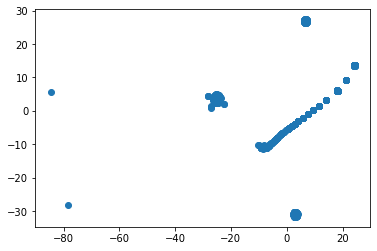

In [1059]:
plt.scatter(items_transformed[:, 0], items_transformed[:, 1], )

In [1060]:
from sklearn.cluster import KMeans

In [1133]:
a = KMeans(n_clusters = 22)
a.fit(items_transformed)

KMeans(n_clusters=22)

In [1073]:
a.cluster_centers_

array([[ -0.31592533,  -6.0282516 ],
       [-26.524883  ,   3.145838  ],
       [ 15.005822  ,  13.444653  ],
       [  3.115839  , -31.017385  ]], dtype=float32)

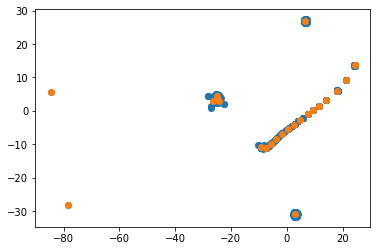

In [1134]:
plt.scatter(items_transformed[:, 0], items_transformed[:, 1])
plt.scatter(a.cluster_centers_[:, 0], a.cluster_centers_[:, 1])

In [1135]:
def compute_rast(dot, centers):
    rasts = []
    for j in range(len(centers)):
        rast = ((dot[0] - centers[j][0])**2 + (dot[1] - centers[j][1])**2)**0.5
        rasts.append(rast)
    return np.array(rasts)

In [1136]:
clusters_items = {}
for i in range(len(a.cluster_centers_)):
    clusters_items[i] = []
for i in range(len(items_transformed)):
    rasts = compute_rast(items_transformed[i], a.cluster_centers_)
    ind = np.argmin(rasts)
    clusters_items[ind].append(names_items[i])

In [1141]:
np.array(clusters_items[7])

array([ 35,  37, 286,  22,  72,  76,  66,  40, 148,   7,  65,  60, 200,
        80,  58,  11], dtype=int64)

In [1101]:
rare_items = []
for i in np.array(clusters_items[3]):
    if len(final_train[final_train['item_id']==i][final_train['like']==1]) != 0:
        rare_items.append(i)

C:\Users\anana\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [1105]:
rare_items

[207, 197, 157, 175, 12, 68]

In [1130]:
final_train[final_train['item_id']== 68][final_train['like']==1]

C:\Users\anana\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,user_id,item_id,like,timestamp,I_0,I_1,I_2,I_3,I_4,I_5,...,U_22,U_23,U_24,U_25,U_26,U_27,U_28,U_29,U_30,U_31
1421,21,68,1,1491168140,0.000491,-0.001112,-0.001039,0.001475,-0.000352,0.000484,...,-0.016915,-0.002815,0.004521,-0.004352,-0.008033,-0.008033,0.001703,-0.004709,-0.004709,0.001199


In [1144]:
temp_dict = {}
for clust in clusters_items:
    temp_dict[clust] = 0
for i in raw_most_popular[:20]:
    for clust in clusters_items:
        if i in clusters_items[clust]:
            temp_dict[clust] += 1

In [1145]:
temp_dict

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 13,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 6,
 14: 0,
 15: 0,
 16: 1,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0}

In [1123]:
final_train[final_train['user_id']==227][final_train['like']==1]['item_id'].values

C:\Users\anana\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


array([137,  13, 175], dtype=int64)

# Try Most Popular

In [1023]:
a = [95, 105,  98,  89, 122, 114,  94,  83, 184, 138, 181,   6,  20, 38, 107, 110,  14,  27,  79, 196]
len(a)

13

In [1015]:
raw_most_popular

array([ 76,  22,  35,  72,  40,  37,  80,  58,  65,  66,  11,  60,  67,
        32,  21,   7, 146,  87,   5,  44,  78,  33, 119, 172, 147,  39,
        36, 155,  17,  70,  30,  19,  59,  49,  71,  88,  63,  18,  90,
       136, 101,  41,   2, 142,  77,  62,   9,   4,  84, 129, 137,  43,
       104,  26,  75, 118,  34,  45,   1,  73, 180, 141, 113,  99, 159,
        95, 105,  98,  89, 122, 114,  94,  83, 184, 138, 181,   6,  20,
        38, 107, 110,  14,  27,  79, 196, 145, 150,  50, 123, 125,  53,
       128,   8,  81,  10,  96,   3,  15, 100, 186,  86, 198, 108, 103,
       112, 160, 168,  31,  23, 115, 111,  24, 131,  13,  25,  28,  16,
        52,  54,  55,  57,   0, 158, 195, 166, 164, 163, 156, 151, 149,
       148, 143, 140, 139, 188, 192, 193, 135, 124, 120, 206,  97, 102,
       117, 178, 204, 177, 175, 176, 183, 174, 173, 205,  29, 182, 203,
       194, 202, 185, 187, 201, 200, 170, 189, 190, 191, 199, 197,  12,
       171,  85, 169, 167,  92,  93, 207, 106, 109, 116,  69,  6

In [ ]:
specific_like = [197, 475]

In [1049]:
final_train[final_train['user_id']==444]

,user_id,item_id,like,timestamp,I_0,I_1,I_2,I_3,I_4,I_5,...,U_22,U_23,U_24,U_25,U_26,U_27,U_28,U_29,U_30,U_31
113,444,172,0,1490939641,0.002252,-0.005097,-0.004763,0.006757,-0.001613,0.002220,...,-0.028996,-0.004825,0.007749,-0.007459,-0.01377,-0.01377,0.002919,-0.008072,-0.008072,0.002055
114,444,107,0,1491197808,0.001253,-0.002836,-0.002650,0.003759,-0.000897,0.001235,...,-0.028996,-0.004825,0.007749,-0.007459,-0.01377,-0.01377,0.002919,-0.008072,-0.008072,0.002055
115,444,39,0,1491003160,0.002252,-0.005097,-0.004763,0.006757,-0.001613,0.002220,...,-0.028996,-0.004825,0.007749,-0.007459,-0.01377,-0.01377,0.002919,-0.008072,-0.008072,0.002055
116,444,118,0,1491090409,0.001515,-0.003428,-0.003204,0.004545,-0.001085,0.001493,...,-0.028996,-0.004825,0.007749,-0.007459,-0.01377,-0.01377,0.002919,-0.008072,-0.008072,0.002055
117,444,9,1,1491062230,0.001554,-0.003517,-0.003287,0.004663,-0.001113,0.001532,...,-0.028996,-0.004825,0.007749,-0.007459,-0.01377,-0.01377,0.002919,-0.008072,-0.008072,0.002055
118,444,159,0,1490960115,0.001390,-0.003146,-0.002940,0.004171,-0.000996,0.001370,...,-0.028996,-0.004825,0.007749,-0.007459,-0.01377,-0.01377,0.002919,-0.008072,-0.008072,0.002055
119,444,70,1,1491075411,0.001702,-0.003853,-0.003600,0.005108,-0.001219,0.001678,...,-0.028996,-0.004825,0.007749,-0.007459,-0.01377,-0.01377,0.002919,-0.008072,-0.008072,0.002055
120,444,119,0,1491067469,0.001996,-0.004518,-0.004222,0.005990,-0.001430,0.001968,...,-0.028996,-0.004825,0.007749,-0.007459,-0.01377,-0.01377,0.002919,-0.008072,-0.008072,0.002055
121,444,87,0,1490998447,0.002624,-0.005938,-0.005549,0.007872,-0.001879,0.002586,...,-0.028996,-0.004825,0.007749,-0.007459,-0.01377,-0.01377,0.002919,-0.008072,-0.008072,0.002055
122,444,76,1,1491048933,0.009798,-0.022177,-0.020722,0.029399,-0.007017,0.009658,...,-0.028996,-0.004825,0.007749,-0.007459,-0.01377,-0.01377,0.002919,-0.008072,-0.008072,0.002055


In [1002]:
user_model[1][1]

array([342, 242, 216, 234, 343, 267, 211,  54, 101, 344, 232, 250, 233,
       252, 322, 346], dtype=int64)

In [1024]:
for_user_without_intersect = {}
for user in user_model:
    temp_arr = np.setdiff1d(raw_most_popular, user_model[user][1], assume_unique=True)
    if user == 4:
        temp_arr = np.array([95, 105,  98,  89, 122, 114,  94,  83, 184, 138, 181,   6,  20, 38, 107, 110,  14,  27,  79, 196])
    for_user_without_intersect[user] = temp_arr[:20]

In [1008]:
np.setdiff1d(raw_most_popular, user_model[1][1], assume_unique=True)

array([ 76,  22,  35,  72,  40,  37,  80,  58,  65,  66,  11,  60,  67,
        32,  21,   7, 146,  87,  44,  78,  33, 119, 172, 147,  39,  36,
       155,  17,  70,  30,  19,  59,  49,  71,  88,  63,  18,  90, 136,
       101,  41,   2, 142,  77,  62,   9,  84, 129, 137,  43, 104,  26,
        75, 118,  34,  45,   1,  73, 180, 141, 113,  99, 159,  95, 105,
        98,  89, 122, 114,  94,  83, 184, 138, 181,   6,  38, 107, 110,
        14,  79, 196, 145, 150,  50, 123,  53, 128,   8,  81,  10,  15,
       100, 186,  86, 198, 103, 112, 160, 168,  31,  23, 115, 111,  24,
       131,  13,  25,  28,  16,  52,  55,  57, 158, 195, 166, 164, 163,
       156, 151, 149, 148, 143, 140, 139, 188, 192, 193, 135, 124, 120,
       206,  97, 102, 117, 178, 204, 177, 175, 176, 183, 174, 173, 205,
        29, 182, 203, 194, 202, 185, 187, 201, 200, 170, 189, 190, 191,
       199, 197,  12, 171,  85, 169, 167,  92,  93, 207, 106, 109, 116,
        69,  68, 121, 126,  64, 127, 130,  61, 133, 134,  56, 14

In [998]:
raw_most_popular = np.array(final_train[final_train['like']==1]['item_id'].value_counts().index)

In [609]:
most_popular = final_train[final_train['like']==1]['item_id'].value_counts()[:20]

In [616]:
most_popular = np.array(most_popular.index)

In [549]:
def test_model(model, X_train=X_train_sc, y_train=y_train_sc, X_val=X_val_sc, y_val=y_val_sc, test_val=test_val, correct=correct):
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)
    loss = log_loss(y_val, y_pred[:, 1])
    
    val_data = creating_array_of_data(test_val, model)
    score = calc_score(correct, val_data[:, 1:], 20)
    
    print('Model: {} \nLog-Loss: {}\nScore: {}'.format(model, loss, score))

In [550]:
knn = KNeighborsClassifier(n_neighbors=40)
test_model(knn)

Model: KNeighborsClassifier(n_neighbors=40) 
Log-Loss: 0.31384876251209615
Score: 0.026402640264026403


In [551]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, log_loss

log_reg = LogisticRegression(max_iter=1000)
test_model(log_reg)


Model: LogisticRegression(max_iter=1000) 
Log-Loss: 0.27496685205713006
Score: 0.052805280528052806


In [552]:
from sklearn.svm import SVC

SVM = SVC(probability=True)
test_model(SVM)

Model: SVC(probability=True) 
Log-Loss: 0.28364469538057185
Score: 0.0594059405940594


In [553]:
from sklearn.ensemble import RandomForestClassifier

ran_for = RandomForestClassifier(n_estimators=10)
test_model(ran_for)

Model: RandomForestClassifier(n_estimators=10) 
Log-Loss: 1.2970228052324884
Score: 0.013201320132013201


In [558]:
from sklearn.naive_bayes import GaussianNB

classif = GaussianNB()
test_model(classif)

Model: GaussianNB() 
Log-Loss: 4.051680876179299
Score: 0.09900990099009901


In [596]:
from sklearn.naive_bayes import BernoulliNB
#binarize = 1.5 - norm
for i in np.arange(1, 10, 1):
    ber = BernoulliNB(binarize=1.5)
    test_model(ber)

Model: BernoulliNB(alpha=0.1, binarize=1.5) 
Log-Loss: 1.2985799254960133
Score: 0.132013201320132
Model: BernoulliNB(alpha=0.2, binarize=1.5) 
Log-Loss: 1.2987509171541773
Score: 0.132013201320132
Model: BernoulliNB(alpha=0.3, binarize=1.5) 
Log-Loss: 1.298923240451708
Score: 0.132013201320132
Model: BernoulliNB(alpha=0.4, binarize=1.5) 
Log-Loss: 1.2991000879211119
Score: 0.132013201320132
Model: BernoulliNB(alpha=0.5, binarize=1.5) 
Log-Loss: 1.2992950102290963
Score: 0.132013201320132
Model: BernoulliNB(alpha=0.6, binarize=1.5) 
Log-Loss: 1.2995531479669136
Score: 0.132013201320132
Model: BernoulliNB(alpha=0.7, binarize=1.5) 
Log-Loss: 1.2999766065000684
Score: 0.132013201320132
Model: BernoulliNB(alpha=0.8, binarize=1.5) 
Log-Loss: 1.300688959849552
Score: 0.132013201320132
Model: BernoulliNB(alpha=0.9, binarize=1.5) 
Log-Loss: 1.3017146217489692
Score: 0.132013201320132


In [589]:
from xgboost import XGBClassifier

xgb = XGBClassifier(subsample=0.8, scale_pos_weight= 1, min_child_weight=1, max_depth=3, gamma=0.2, colsample_bytree=0.8)
test_model(xgb)

Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None) 
Log-Loss: 0.2376644895006451
Score: 0.0594059405940594


In [587]:
params = {
    'max_depth': [3],
    'min_child_weight': [1],
    'gamma': [0.2],
    'colsample_bytree': [i/10.0 for i in range(6,10)],
    'subsample': [i/10.0 for i in range(6,10)],
    'scale_pos_weight': [1]
}

In [585]:
param_logs = []

In [573]:
from sklearn.model_selection import RandomizedSearchCV

In [588]:
xgb_cv = RandomizedSearchCV(xgb, params, scoring='f1')
xgb_cv.fit(X_train_sc, y_train_sc)
print(xgb_cv.best_score_, xgb_cv.best_params_)
param_logs.append(xgb_cv.best_params_)

0.689037868498357 {'subsample': 0.8, 'scale_pos_weight': 1, 'min_child_weight': 1, 'max_depth': 3, 'gamma': 0.2, 'colsample_bytree': 0.8}


In [542]:
nn[:, 1:][0]

array([222., 302., 300., 299., 298., 297., 296., 295., 294., 293., 292.,
       291., 290., 289., 288., 287., 286., 285., 284., 283.])

In [618]:
def creating_array_of_data(test, model, most_popular=most_popular, preds=True):
    array_test_data = np.empty((len(test), 21))
    for i in range(len(test)):
        aa = test.iloc[[i]].merge(c) #loc
        concatenated = pd.concat([aa, b])
        concatenated.fillna(method='ffill', inplace=True)
        concatenated = concatenated[1:]
        concatenated.drop(['user_id', 'item_id'], axis=1, inplace=True)
        concatenated = scaler.transform(concatenated)
        
        if preds:
            predictions = model.predict_proba(concatenated)
            a = pd.DataFrame(predictions[:, 1], columns=['pred'])
            a = a.sort_values('pred', ascending=False)
            indices = a[:20].index
        else:
            indices = most_popular
        array_test_data[i] = (np.hstack((aa['user_id'], indices)).reshape(1, -1))
    return array_test_data

In [619]:
array = creating_array_of_data(test, ber, preds=False)

In [1025]:
array = creating_array_for_each(test, for_user_without_intersect, most_popular)

In [1026]:
pd.DataFrame(array, columns=np.hstack((['user_id'], np.arange(20))), dtype='int').to_csv('for each without inter.csv', index=False)

In [1028]:
trying = pd.read_csv('for each without inter.csv')
trying[trying['user_id']==4]

,user_id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
210,4,95,105,98,89,122,114,94,83,184,...,181,6,20,38,107,110,14,27,79,196


In [158]:
sample_submission

,user_id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,166,172,47,117,192,323,251,195,359,9,...,277,242,292,87,70,88,396,314,193,39
1,26,87,174,88,337,165,25,333,72,265,...,115,243,197,335,431,338,99,177,243,285
2,41,147,147,398,423,288,265,185,127,32,...,202,244,151,163,370,183,28,290,128,128
3,286,420,53,389,38,244,273,335,388,105,...,442,31,376,257,321,425,57,291,358,119
4,108,267,430,82,91,384,398,99,53,396,...,426,84,203,324,262,47,127,131,356,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,190,47,243,102,36,241,151,402,282,307,...,333,117,158,119,372,79,194,331,388,64
493,181,156,228,439,103,318,238,186,226,326,...,163,53,392,205,399,207,242,236,219,403
494,448,330,266,437,388,195,168,393,311,384,...,156,350,185,81,69,225,374,235,301,261
495,124,280,239,13,151,418,349,203,442,173,...,194,425,7,143,384,431,123,42,230,241


C:\Users\anana\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [151]:
sample_submission.shape

(497, 21)

In [80]:
pd.Index(a)

ValueError: Index data must be 1-dimensional

In [42]:
predictions.

(444, 2)

In [44]:
np.arange(len(predictions)).shape

(444,)

In [50]:
predictions[:, 1]

array([0.85517376, 0.5008126 , 0.99999913, 0.86831692, 1.        ,
       0.80893327, 0.88050774, 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.58318377, 1.        , 0.99999009,
       1.        , 0.89163391, 1.        , 0.99896259, 1.        ,
       0.99999591, 1.        , 0.99997   , 1.        , 0.99719491,
       0.9998734 , 1.        , 1.        , 0.84085019, 1.        ,
       1.        , 0.99999974, 0.99998456, 1.        , 0.99819852,
       0.99997315, 0.99997596, 1.        , 0.99989856, 1.        ,
       0.9945623 , 0.99999992, 0.99997848, 1.        , 1.        ,
       0.99686667, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.91126891, 0.99999938, 0.99999984, 0.99999931,
       0.2098656 , 1.        , 1.        , 1.        , 0.99999968,
       0.99999998, 1.        , 0.99975397, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99999865,
       1.        , 1.        , 1.        , 1.        , 1.     

In [52]:
preds_indices = np.hstack((predictions[:, 1].reshape(-1, 1), np.arange(len(predictions)).reshape(-1, 1)))

In [57]:
pd.DataFrame(preds_indices)

,0,1
0,0.855174,0.0
1,0.500813,1.0
2,0.999999,2.0
3,0.868317,3.0
4,1.000000,4.0
...,...,...
439,1.000000,439.0
440,1.000000,440.0
441,1.000000,441.0
442,0.999996,442.0


In [86]:
sample_submission

,user_id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,166,172,47,117,192,323,251,195,359,9,...,277,242,292,87,70,88,396,314,193,39
1,26,87,174,88,337,165,25,333,72,265,...,115,243,197,335,431,338,99,177,243,285
2,41,147,147,398,423,288,265,185,127,32,...,202,244,151,163,370,183,28,290,128,128
3,286,420,53,389,38,244,273,335,388,105,...,442,31,376,257,321,425,57,291,358,119
4,108,267,430,82,91,384,398,99,53,396,...,426,84,203,324,262,47,127,131,356,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,190,47,243,102,36,241,151,402,282,307,...,333,117,158,119,372,79,194,331,388,64
493,181,156,228,439,103,318,238,186,226,326,...,163,53,392,205,399,207,242,236,219,403
494,448,330,266,437,388,195,168,393,311,384,...,156,350,185,81,69,225,374,235,301,261
495,124,280,239,13,151,418,349,203,442,173,...,194,425,7,143,384,431,123,42,230,241


In [1020]:
y = 0.539235412474849
result = 100 if y > 0.54 else (40 + (y - 0.5) / 0.04 * 60 if y > 0.5 else 0)
result

98.85311871227344